In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal,permutation
# from tensorflow.examples.tutorials.mnist import input_data
import pandas as pd
from pandas import DataFrame, Series
from matplotlib.font_manager import FontProperties

fp = FontProperties(fname=r'/system/library/fonts/ヒラギノ角ゴシック W0.ttc', size = 14)

np.random.seed(19961123)
tf.set_random_seed(19961123)

%config IPCompleter.greedy=True
%matplotlib inline
%matplotlib notebook

/Users/yamamotomasaomi/.pyenv/versions/anaconda3-5.1.0/envs/makuwo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
def generate_datablock(n, mu, var, t):
    data = np.random.multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns = ['x1', 'x2'])
    df['t'] = t
    return df

# 領域を４分割に作成。これらの値をtrain_setに格納していく
df0 = generate_datablock(30, [-7,-7], 18, 1)
df1 = generate_datablock(30, [-7, 7], 18, 0)
df2 = generate_datablock(30, [ 7,-7], 18, 0)
df3 = generate_datablock(30, [ 7, 7], 18, 1)

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

In [3]:
train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

In [4]:
# mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

In [5]:
# 隠れ層のノード数の指定
num_units1 = 2
num_units2 = 2

x = tf.placeholder(tf.float32, [None, 2])

# 一層目
w1 = tf.Variable(tf.truncated_normal([2, num_units1]))
b1 = tf.Variable(tf.zeros([num_units1]))
hidden1 = tf.nn.tanh(tf.matmul(x, w1)+b1)

# 二層目（XOR演算）
w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.tanh(tf.matmul(hidden1, w2) + b2)

# 出力層
w0 = tf.Variable(tf.zeros([num_units2,1]))
b0 = tf.Variable(tf.zeros([1]))
p = tf.nn.sigmoid(tf.matmul(hidden2, w0) + b0)

In [6]:
t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t * tf.log(p) + (1-t) * tf.log(1-p))
train_step = tf.train.GradientDescentOptimizer(0.07).minimize(loss)
# train_step = tf.train.AdamOptimizer().minimize(loss)

# 学習率の指定
correct_prediction = tf.equal(tf.sign(p - 0.5), tf.sign(t - 0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [8]:
# 正解率の計算
i=0
for _ in range(2000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss,accuracy],feed_dict={x:train_x, t:train_t})
        print ('Step:%d, Loss:%f, Accuracy:%f' % (i, loss_val, acc_val) )

Step:100, Loss:68.314377, Accuracy:0.675000
Step:200, Loss:39.090866, Accuracy:0.875000
Step:300, Loss:39.146416, Accuracy:0.875000
Step:400, Loss:39.145302, Accuracy:0.875000
Step:500, Loss:39.144554, Accuracy:0.875000
Step:600, Loss:39.143929, Accuracy:0.875000
Step:700, Loss:39.143394, Accuracy:0.875000
Step:800, Loss:39.142944, Accuracy:0.875000
Step:900, Loss:39.142563, Accuracy:0.875000
Step:1000, Loss:39.142231, Accuracy:0.875000
Step:1100, Loss:39.141960, Accuracy:0.875000
Step:1200, Loss:39.141731, Accuracy:0.875000
Step:1300, Loss:39.141541, Accuracy:0.875000
Step:1400, Loss:39.141396, Accuracy:0.875000
Step:1500, Loss:39.141281, Accuracy:0.875000
Step:1600, Loss:39.141212, Accuracy:0.875000
Step:1700, Loss:39.141182, Accuracy:0.875000
Step:1800, Loss:39.141205, Accuracy:0.875000
Step:1900, Loss:39.141289, Accuracy:0.875000
Step:2000, Loss:39.141457, Accuracy:0.875000


In [9]:
w1_val , b1_val=sess.run([w1,b1])
print (w1_val)
print (b1_val)

[[ 6.815619  -0.7824834]
 [ 1.2511846 -5.152375 ]]
[-2.7414606   0.79206765]


In [10]:
# それぞれのw11,w21,w22,w12という一次関数に代入する値を設定する。
w11 = w1_val[0][0]
w21 = w1_val[1][0]
w12 = w1_val[1][1]
w22 = w1_val[0][1]
b1_final = b1_val[0] 
b2_final = b1_val[1]

In [11]:
# b1_val[0]

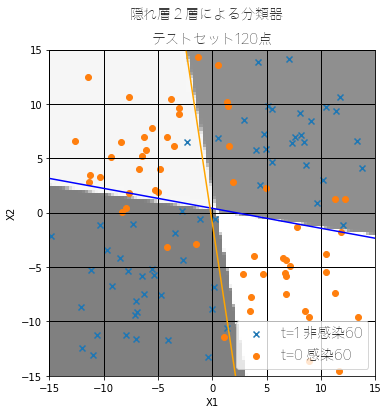

In [12]:
train_set1 = train_set[train_set['t'] == 1]
train_set2 = train_set[train_set['t'] == 0]

fig = plt.figure(figsize=(6, 6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([-15, 15])
subplot.set_xlim([-15, 15])

# マーカーの配置
subplot.scatter(train_set1.x1, train_set1.x2, marker = 'x',label = "t=1 非感染{}".format(len(train_set1)))
subplot.scatter(train_set2.x1, train_set2.x2, marker = 'o',label = "t=0 感染{}".format(len(train_set2)))

locations = []
for x2 in np.linspace(-15, 15, 100):
    for x1 in np.linspace(-15, 15, 100):
        locations.append((x1, x2))

p_vals = sess.run(p, feed_dict={x:locations})
p_vals = p_vals.reshape((100, 100))

#XOR計算の結果を描画(隠れ層２の計算結果の表示)
subplot.imshow(p_vals, origin='lower', extent = (-15, 15, -15, 15), cmap = plt.cm.gray_r, alpha = 0.5)                        

x_line = np.arange(-15, 15 ,0.1)

# 一次関数のエッジを作る
subplot.plot(x_line, -((w21/w11)*x_line+b1_final/w11), color='blue')
subplot.plot(x_line, -(w12/w22)*x_line+b2_final/w22, color='orange')

# グリッドを作る
subplot.grid(which='major', color='black', linestyle='-', linewidth = 1)
subplot.grid(which='minor', color='black', linestyle='-')

# 題名と軸ラベルをかく。
plt.suptitle(u'隠れ層２層による分類器',fontproperties=fp)
plt.title(u'テストセット{}点'.format(len(train_set)),fontproperties=fp)
plt.xlabel(u'X1')
plt.ylabel(u'X2')
plt.legend(prop=fp, loc='lower right')

# グラフのロジック

オレンジの線は、b1＜0のため、原点に向かう値は負となるため、左の領域が、正になり、右の領域が負となる。
ブルーの線は、b2＞0のため、原点に向かう値は、正となるため、下側が正の数となる。つまり、右下の白の領域が正と正で選り分けられる。さらに、左上の白の領域は負と負の領域を満たし、XORと同じような選り分けを可能としている。

これを単層で実現させることは不可能である。両端に非感染の値が存在し、領域で分類することが不可能になるためである。

一層目の隠れ層の出力は、z1,z2平面の４つの点に対応し、値を散らして、格納する。
tanh(x1, x2)の値を配列にぶち込んで、tanhは、1から、−1への値遷移の速度が速いため、-1と１になる差がつきやすい。

二層目で、どのような分類が可能であるかを計算している。

```python
w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.tanh(tf.matmul(hidden1, w2) + b2)
```

## 隠れ層の役割
tanhの計算は、(x1, x2)のデータをこのデータの平面で上での直線で分割する操作となる。
それを急激に変化させることで、分類を可能としている。

この値をシグモイド関数に打ち込むことで、初めて分類を可能としているわけだ。

今回の場合、z1,z2は４つの領域でそれぞれ決まった値をとるので、結局４つの領域それぞれに異なる確率が割り当てられることになる。



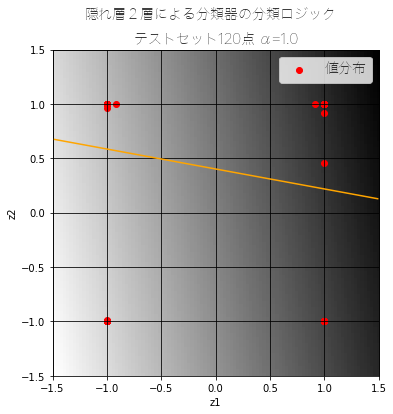

In [13]:
cell1 = sess.run(hidden1,feed_dict={x:train_x, t:train_t})

fig = plt.figure(figsize=(6, 6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([-1.5, 1.5])
subplot.set_xlim([-1.5, 1.5])

# グリッドを作る
subplot.grid(which='major', color='black', linestyle='-')
subplot.grid(which='minor', color='black', linestyle='-')

# Splitで配列の分割
cellx, celly = np.split(cell1, 2, axis=1)

# マーカーの配置
subplot.scatter(cellx, celly, marker = 'o',label = "値分布",color = 'red')

# 一次関数のエッジを作る
w_val, b_val = sess.run([w1,b1])
z1_line = np.arange(-1.5, 1.5, 0.01)
w10 = w_val[0][0]
w20 = w_val[1][0]
b0_final = b_val[0]
subplot.plot(z1_line, -(w20/w10*z1_line + b0_final/w10),color='orange')

# 値の範囲のペイント
field = [[(w10*z1+w20*z2 + b0_final)
          for z1 in np.linspace(-1.5, 1.5,100)]
        for z2 in np.linspace(-1.5, 1.5,100)]
subplot.imshow(field, origin='lower', extent = (-1.5, 1.5, -1.5, 1.5), cmap = 'gray_r', alpha = 1.0)                        

# 題名と軸ラベルをかく。
plt.suptitle(u'隠れ層２層による分類器の分類ロジック',fontproperties=fp)
plt.title(u'テストセット{}点 α=1.0'.format(len(train_set)),fontproperties=fp)
plt.xlabel(u'z1')
plt.ylabel(u'z2')
plt.legend(prop=fp, loc='upper right')